## Методы кластеризации

#### Дано:
множество объектов
    
#### Требуется: 
разбить это множество объектов на группы таким образом, чтобы элементы внутри одной группы были похожи друг на друга, а элементы из разных групп отличались. Такие группы похожих объектов мы будем называть кластеры. 

Следует отличать методы кластеризации от методов классификации. 

Методы классификации — это методы обучения с учителем. Это значит, что для каждого объекта нам известна его истинная метка принадлежности к классу. Затем, имея истинные метки, предсказания алгоритма и некоторую функцию потерь, алгоритмы классификации как-то подстраиваются так, чтобы допускать меньше ошибок на данных. 

Алгоритмы же кластеризации никак не используют информацию об истинных метках объектов и оперируют лишь похожестью объекта.

Ну а что такое похожесть, в каждом алгоритме кластеризации определяется по-своему. 

####  Зачем вообще нужна кластеризация? 

- выявить структуру в данных.

- автоматически найти группу похожих объектов

- выделить аномалии (какие-то изолированные объекты),
которые требуют дополнительного изучения или выбрасывания из данных

- позволяет провести более детальный анализ кластеров. 


## Группы методов кластеризации

- кластеризация на основе прототипов (Prototype-based methods)

- иерархические методы кластеризации (Hierarchical methods)

- плотностные методы кластеризации (Density-based methods)

- Вероятностные (Probabilistic model-based methods)

- Сеточные (Grid-based methods)

- Спектральные (Spectral clustering)

### Методы разбиения на основе прототипов


+ Методы разбиения на основе прототипов заключаются в том, что кластеры характеризуются некоторым базовым элементом или прототипом.

+ методе k-средних кластер характеризуется центроидом — центром масс объектов из кластера.

+ в результате получаем метки принадлежности объектов к кластерам (строгое разбиение всех наших объектов на кластеры)
1 объекту - 1 метка кластера


### Иерархические методы

- позволяют получить целую структуру (иерархию) вложенных друг в друга кластеров.

Иногда это бывает полезно для того, чтобы понять вообще структуру наших данных от начала до конца. 


### Плотностные методы

- кластер - область с большой плотностью объектов.

- позволяет выявлять произвольные формы кластеров

- выделять объекты-выбросы, то есть элементы, вокруг которых нет других точек.

## Метод k-средних

### Оптимизационная задача

дано множество объектов $x = {x_{1}, x_{2}, ..., x_{N}}$

у нас есть некоторое множество объектов
 
кластер $C_k - центроид \mu$

мы хотим найти в них к-кластеров, каждый из которых характеризуется центроиду. 

объект $x_i \in C_k <=> \mu_{k} = arg \min_{\mu_i} ||x_i - \mu_j||^2$

Объект относится к соответствующему кластеру, если его центроид находится ближе других центроидов к этому объекту

давайте теперь будем кластеризовывать объекты таким образом, чтобы минимизировать следующий критерий. Это сумма квадратов расстояния между объектом и ближайший к нему центроидов по всем кластерам. 

$L(C) = \sum {j = 1}{k} \sum {}{} ||x_i - \mu_j ||^2$

$\mu_k = \sum {}{}x_i$

 Итак, несмотря на то, что у нас есть формулировка критерия и мы знаем, как считать центроид. Для того, чтобы найти глобальный минимум этого функционала нужно перебирать все возможные разбиения объектов на к-кластеров, что нам конечно же не так интересно

Спасает нас алгоритм к-средних, который позволяет найти локальный минимум этого критерия. 

Вход: объекты X, k - количество кластеров

Состоит он из следующих шагов: 

начинаем мы с того, что инициализируем наши к-центроидов.

$\mu_1, \mu_2, \mu_3, ...$

На втором шаге мы обновляем состав кластеров, то есть приписываем объект к тому кластеру центроид, который расположен ближе к этому объекту. 

И на третьем шаге мы обновляем положение самих центроидов, то есть мы пересчитываем положение центроидов, как центр масс объектов, которые лежат в соответствующем кластере.

$\mu_j = \frac {\sum_{x_i \in C_j} x_i} {|C_j|}$

Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила остановок, например, будет достигнуто какое-то максимальное количество итераций или пока кластеры не перестанут меняться.

### Основные факторы

1) начальная инициализация центроидов

 Оказывается, что на одним и тех же данных при одних и тех же k, но при разной инициализации мы можем получить совершенно разное разбиение на кластеры
 
 
 - выбрать k-случайных объектов в наших данных в качестве центроидов и уже с этих центроидов начинать следующие шаги алгоритма.
 - k-кластеров полученных после применения иерархической кластеризации с методом Уорда.
 - И третий метод: К-Means++ и заключается он в следующем:
      + Первый центроид мы будем выбирать случайным образом среди всех точек в данных, которые у нас есть. 
      + Для каждой точки мы будем рассчитывать расстояние до ближайшего центроида, который ранее был уже нами инициализирован
      $d_{min}(x_i) = \min_{\mu_i} ||x_i - \mu_j||$
      
      + Ну и в качестве следующего центроида мы будем выбирать также точки наших данных, но с вероятностью пропорционально как раз этому расстояние, которое мы посчитали на шаге предыдущем.
      
    $p(x_i)~d_{min}(x_i)$
   
2) количество кластеров

как выбрать k?

- положиться на модификации k-means с автоматическим определением k (X-means, intelligent k-means)

- воспользоваться некоторой мерой и качеством кластеризации. Для каждого k и разбиения мы будем считать меру качества кластеризации и в соответствии с этой мерой выберем лучшее разбиение и, соответственно, лучшее k.

-  воспользоваться некоторыми эвристиками, одной из которых Метод Локтя . 

В чем заключается Метод Локтя?

+ Для каждого k будем считать значение критерия k-means.

+ Если расположить эти значения на графике, то мы получим примерно такую убывающая функцию.

Нам нужно найти такое k, начиная с которого значение критерия k-means будет убывать не слишком быстро.

Этот эффект очень визуально похож на локоть и отсюда, собственно, название этого метода (Метод Локтя).

+ метод к-средних это жадный и итеративный алгоритм

+ имеет множество различных модификаций.

+ Результаты полученные после применения метода к-средних в основном зависит либо от начальных центроидов, либо от k, от количества кластеров, которые мы хотим получить на выходе.

+ множество способов определить количество кластеров


## Иерархическая кластеризация. Агломеративный алгоритм

позволяет получить не просто разбиение на кластеры, а целую иерархию кластеры

Первый способ — агломеративный.

- Мы начинаем с той ситуации, когда каждый объект является отдельным кластером. 

- Затем на каждом шаге мы объединяем два наиболее близких кластера в один

- останавливаемся тогда, когда все объекты оказываются в одном большом кластере. 

Дивизивный подход, он зеркален агломеративному. 

- Мы начинаем с ситуации, когда все объекты объединены уже в один большой кластер

- далее на каждом шаге большие кластеры мы бьем на два поменьше и 

- останавливаемся тогда, когда каждый кластер состоит из одного объекта. 

Так уж получилось, что агломеративный подход получил большую практическую популярность, чем дивизивный

видно, что объект номер 5 и номер 7 расположены наиболее близко друг к другу в смысле евклидова расстояния. Поэтому просто объединим их в один кластер, состоящий из двух объектов.

Дальше нам нужно как-то просчитать расстояние между этим кластером и всеми остальными кластерами. Оказывается, есть несколько способов пересчета расстояния между кластерами после их объединения. По-английски эти способы называются Linkage. 

Первый способ — Single Linkage, и в нем расстояние между кластерами вычисляется как минимальное между всеми парами объектов из разных кластеров. 

Второй способ — Complete Linkage. В нем расстояние между кластерами считается как максимальное расстояние между парами объектов из разных кластеров. 

Average Linkage — это просто среднее расстояние между всеми парами объектов из разных кластеров.

Centroid Linkage — это расстояние между центроидами разных кластеров

Ward Linkage — это немного модифицированный Centroid Linkage с учетом размеров самих кластеров.


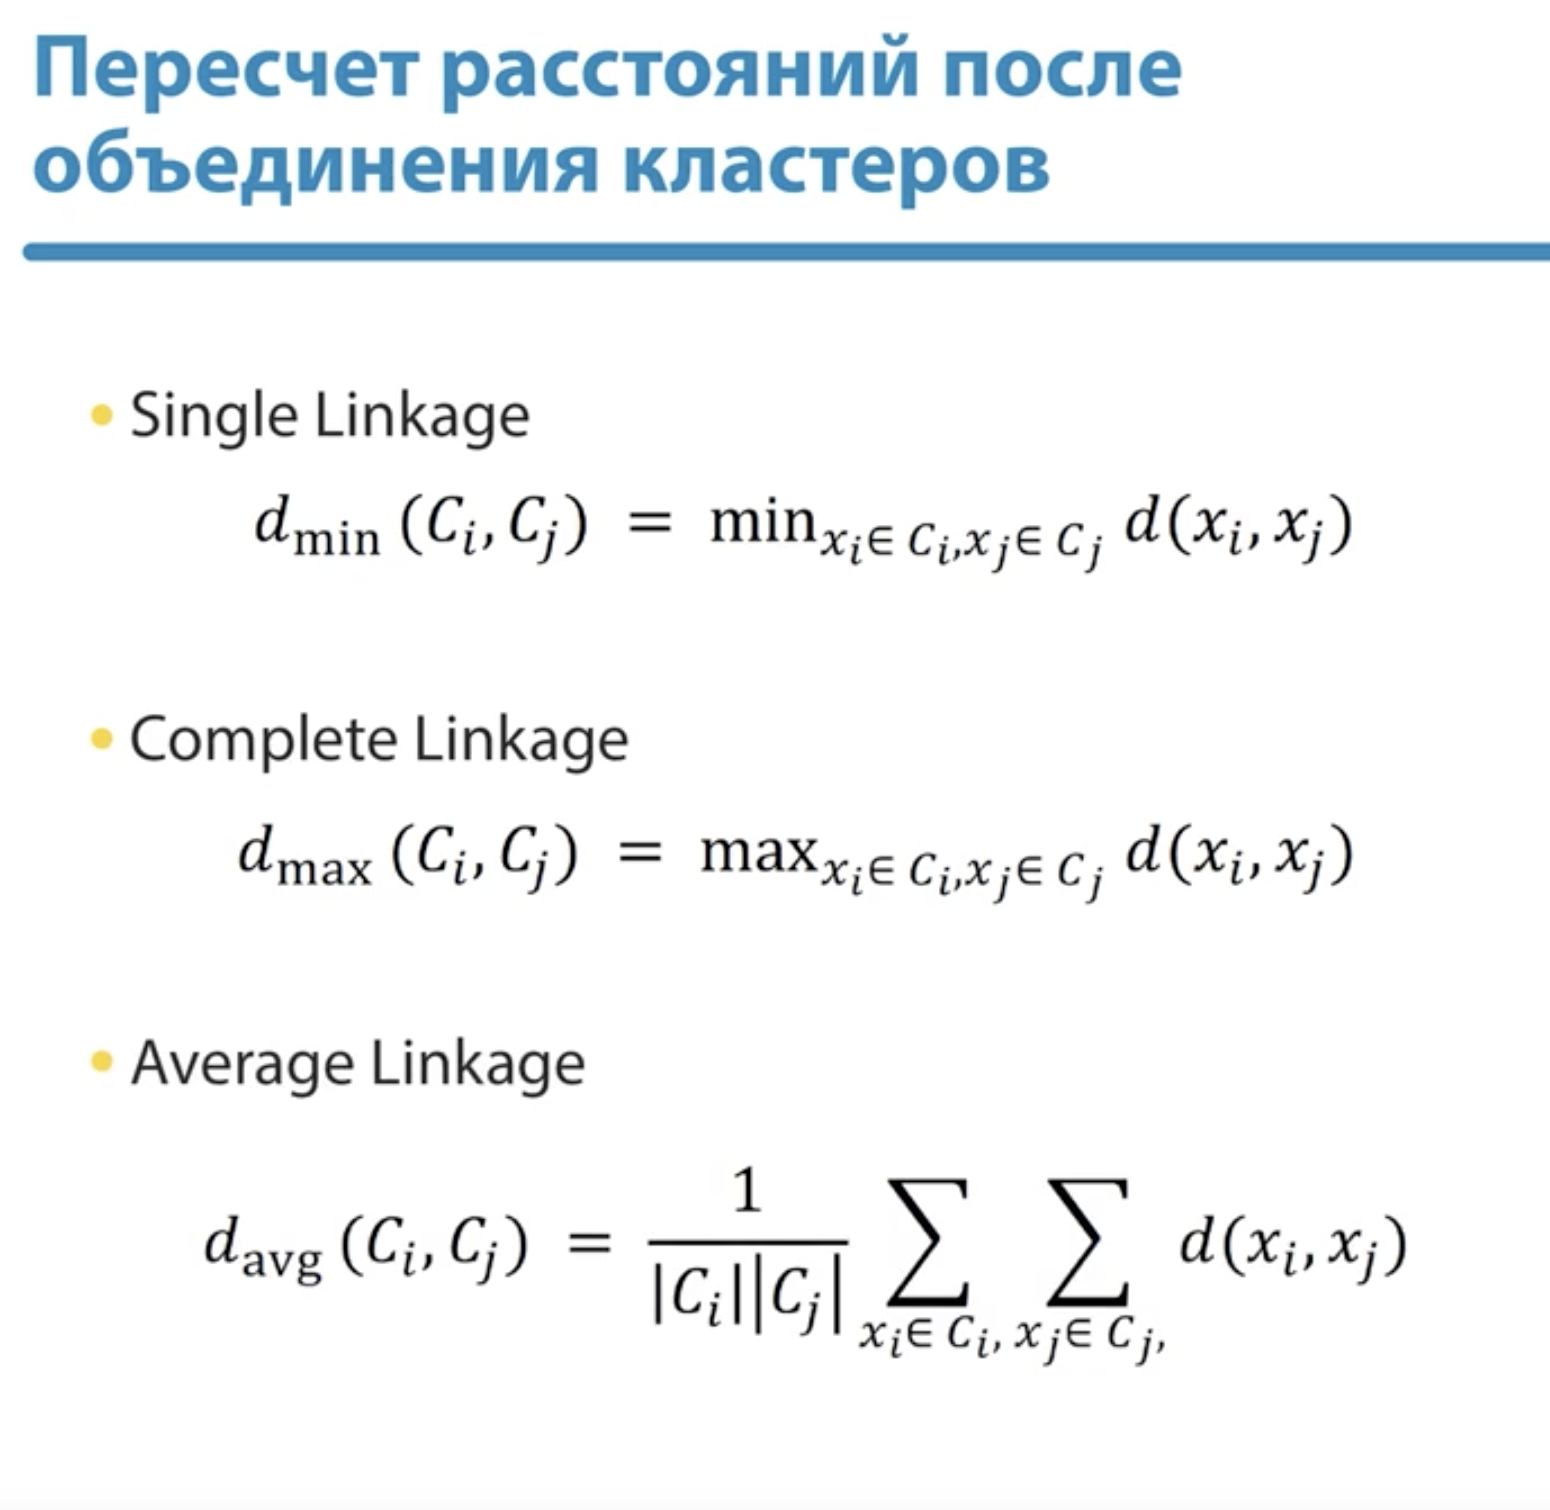

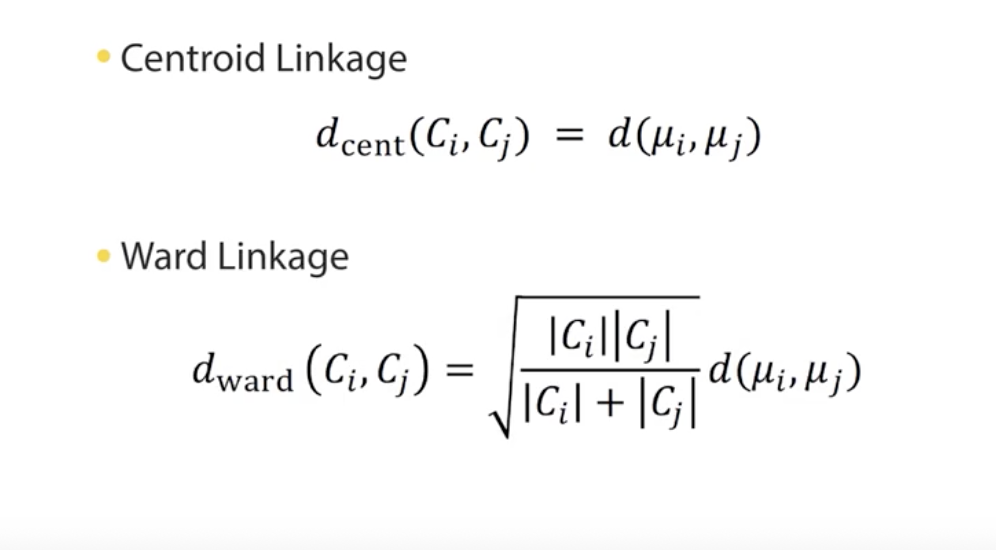

Оказывается, есть другой, более элегантный способ визуализации иерархии, и он называется «дендрограмма». На оси X у дендрограммы расположены названия объектов, а на оси Y — расстояние, на котором соответствующие объекты, кластеры, объединяются друг с другом.

Для того чтобы научиться считать качество дендрограммы, нам нужно научиться считать некоторые величины. Первая такая величина называется «кофенетическое расстояние», и она считается между всеми парами исходных объектов. Кофенетическое расстояние между двумя объектами равно высоте дерева, на котором два объекта объединились в один кластер.

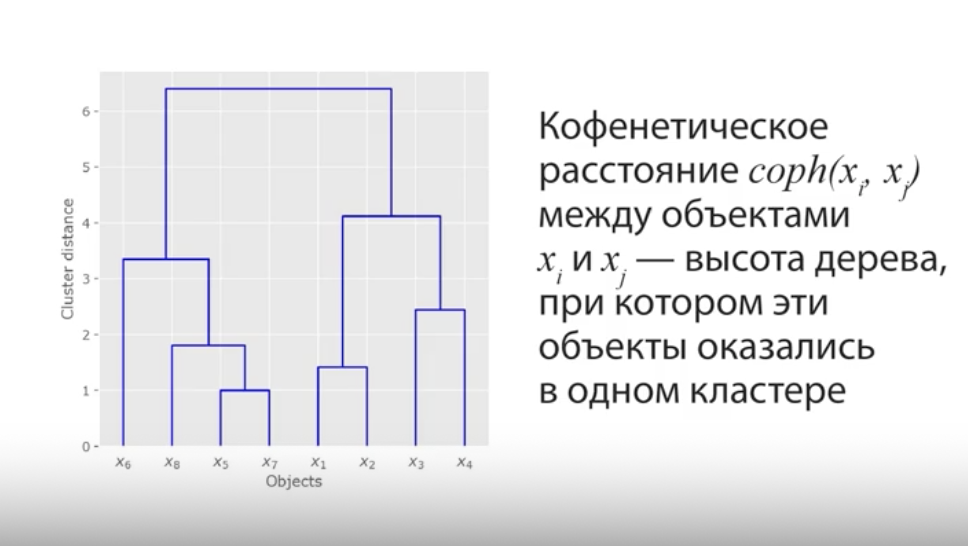

Далее, имея массив кофенетических расстояний между всеми парами объектов и массив обычных попарных расстояний, мы можем посчитать корреляцию между этими массивами, и это и будет кофенетическая корреляция. Эвристическое правило звучит так, что у хорошей дендрограммы корреляция между попарным расстоянием и кофенетическим расстоянием будет высокой.

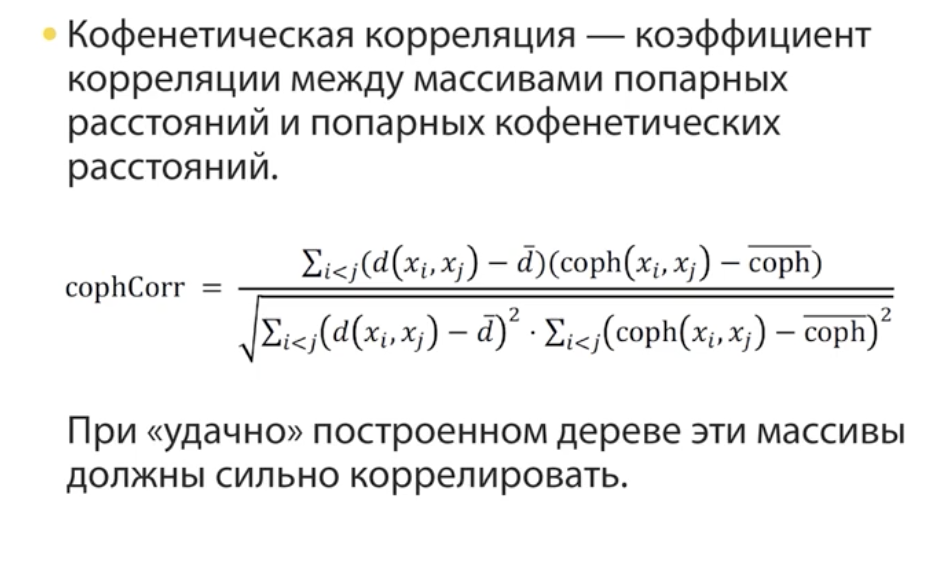

Но у этого метода есть свои недостатки. Во-первых, так как нам нужно хранить все попарные расстояния, то сложность этого алгоритма по памяти составляет O(N²). Более того, нам нужно каждый раз пересчитывать эти расстояния и находить среди них минимальное, и таким образом сложность по времени этого алгоритма равна O(N² * log(N)), что довольно-таки нескромно. 

## Плотные кластеры

DBSCAN относится к методам плотностной кластеризации.

То есть он выделяет плотные кластеризации — это области высокой концентрации точек, разделенные областью низкой концентрации точек. 

Особенностью алгоритмов плотностной кластеризации является то, что кластеры, полученные в результате, могут иметь произвольную форму. 

И вторая особенность заключается в том, что алгоритм позволяет выявить выбросы данных, которые, например, можно выкинуть. 

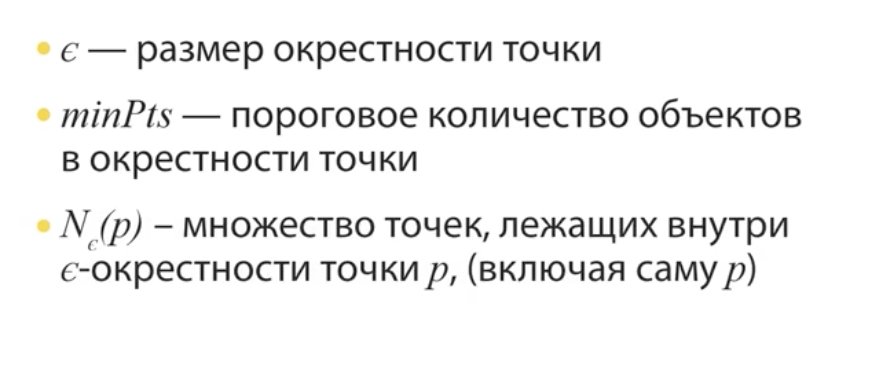

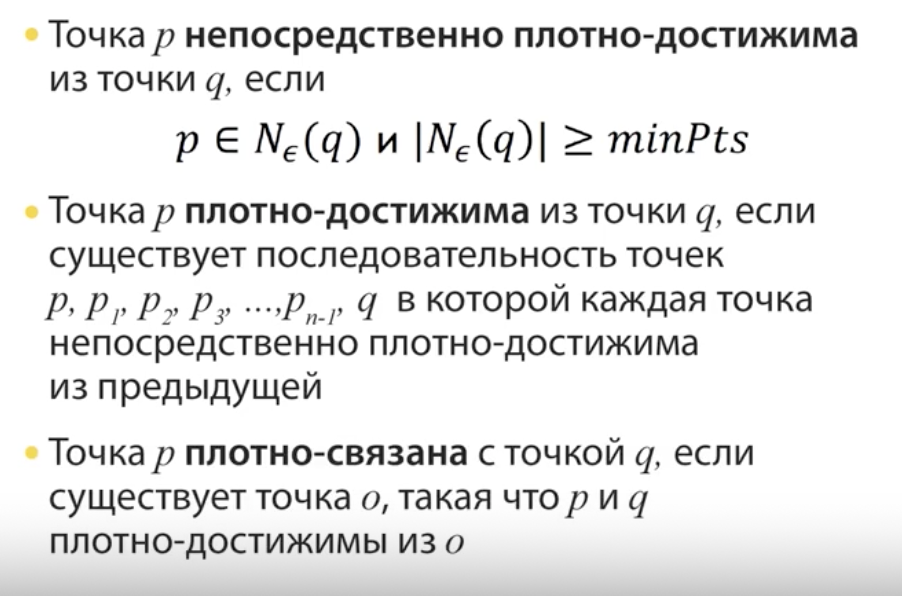

Тогда кластером мы будем называть максимальное множество плотно-связанных точек. 

преимущества он нам предлагает? Во-первых, он сам определяет количество кластеров. Нам нужно задать только параметр minPts и ε, и дальше сколько кластеров получится, столько получится. Кластеры могут иметь произвольную форму, и алгоритм DBSCAN также позволяет выявлять выбросы данных. Однако у DBSCAN есть определенный недостаток, и он связан с тем, что он не работает в том случае, когда кластеры имеют разную плотность. 

## Виды оценок качества кластеризации

Меры качества кластеризации можно разделить на две группы. 


- Первая группа - это качество по отношению к некоторому эталонному разбиению. 

Для некоторых наборов данных уже известно истинное разбиение на кластеры и мы хотим просто сравнить полученную кластеризацию с этим истинным разбиением. Такие методы оценок называются External measures и по-русски я их буду называть мерой качества разбиения.

- Вторая группа мер - это меры качества по отношению к некоторым нашим представлениям о том, что такое хорошая кластеризация.

По-русски я буду их называть мера валидности разбиения. А по-английски они называются Internal measures.


Первая мера качества по отношению к эталонному разбиению - это Rand Index. 

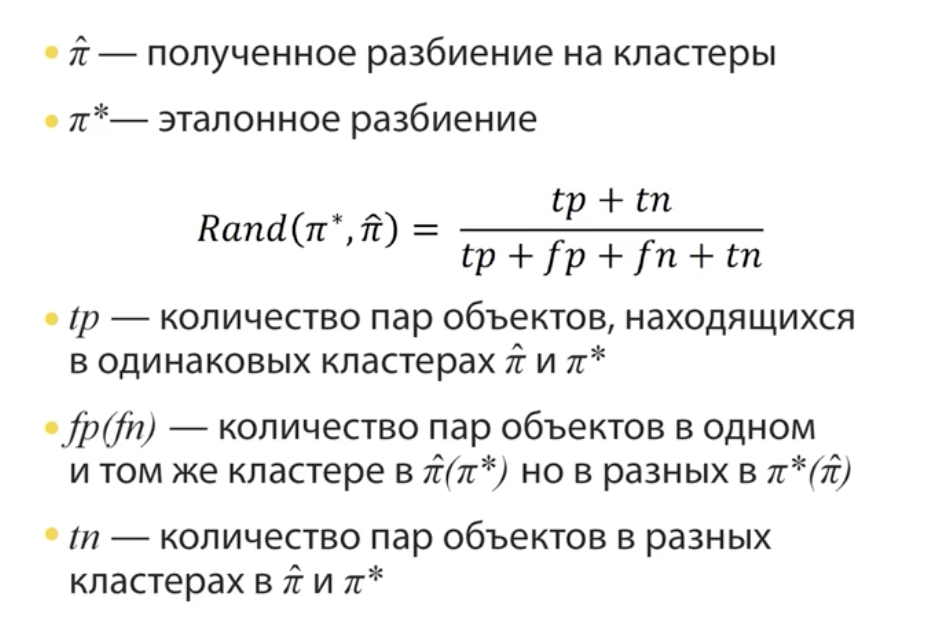

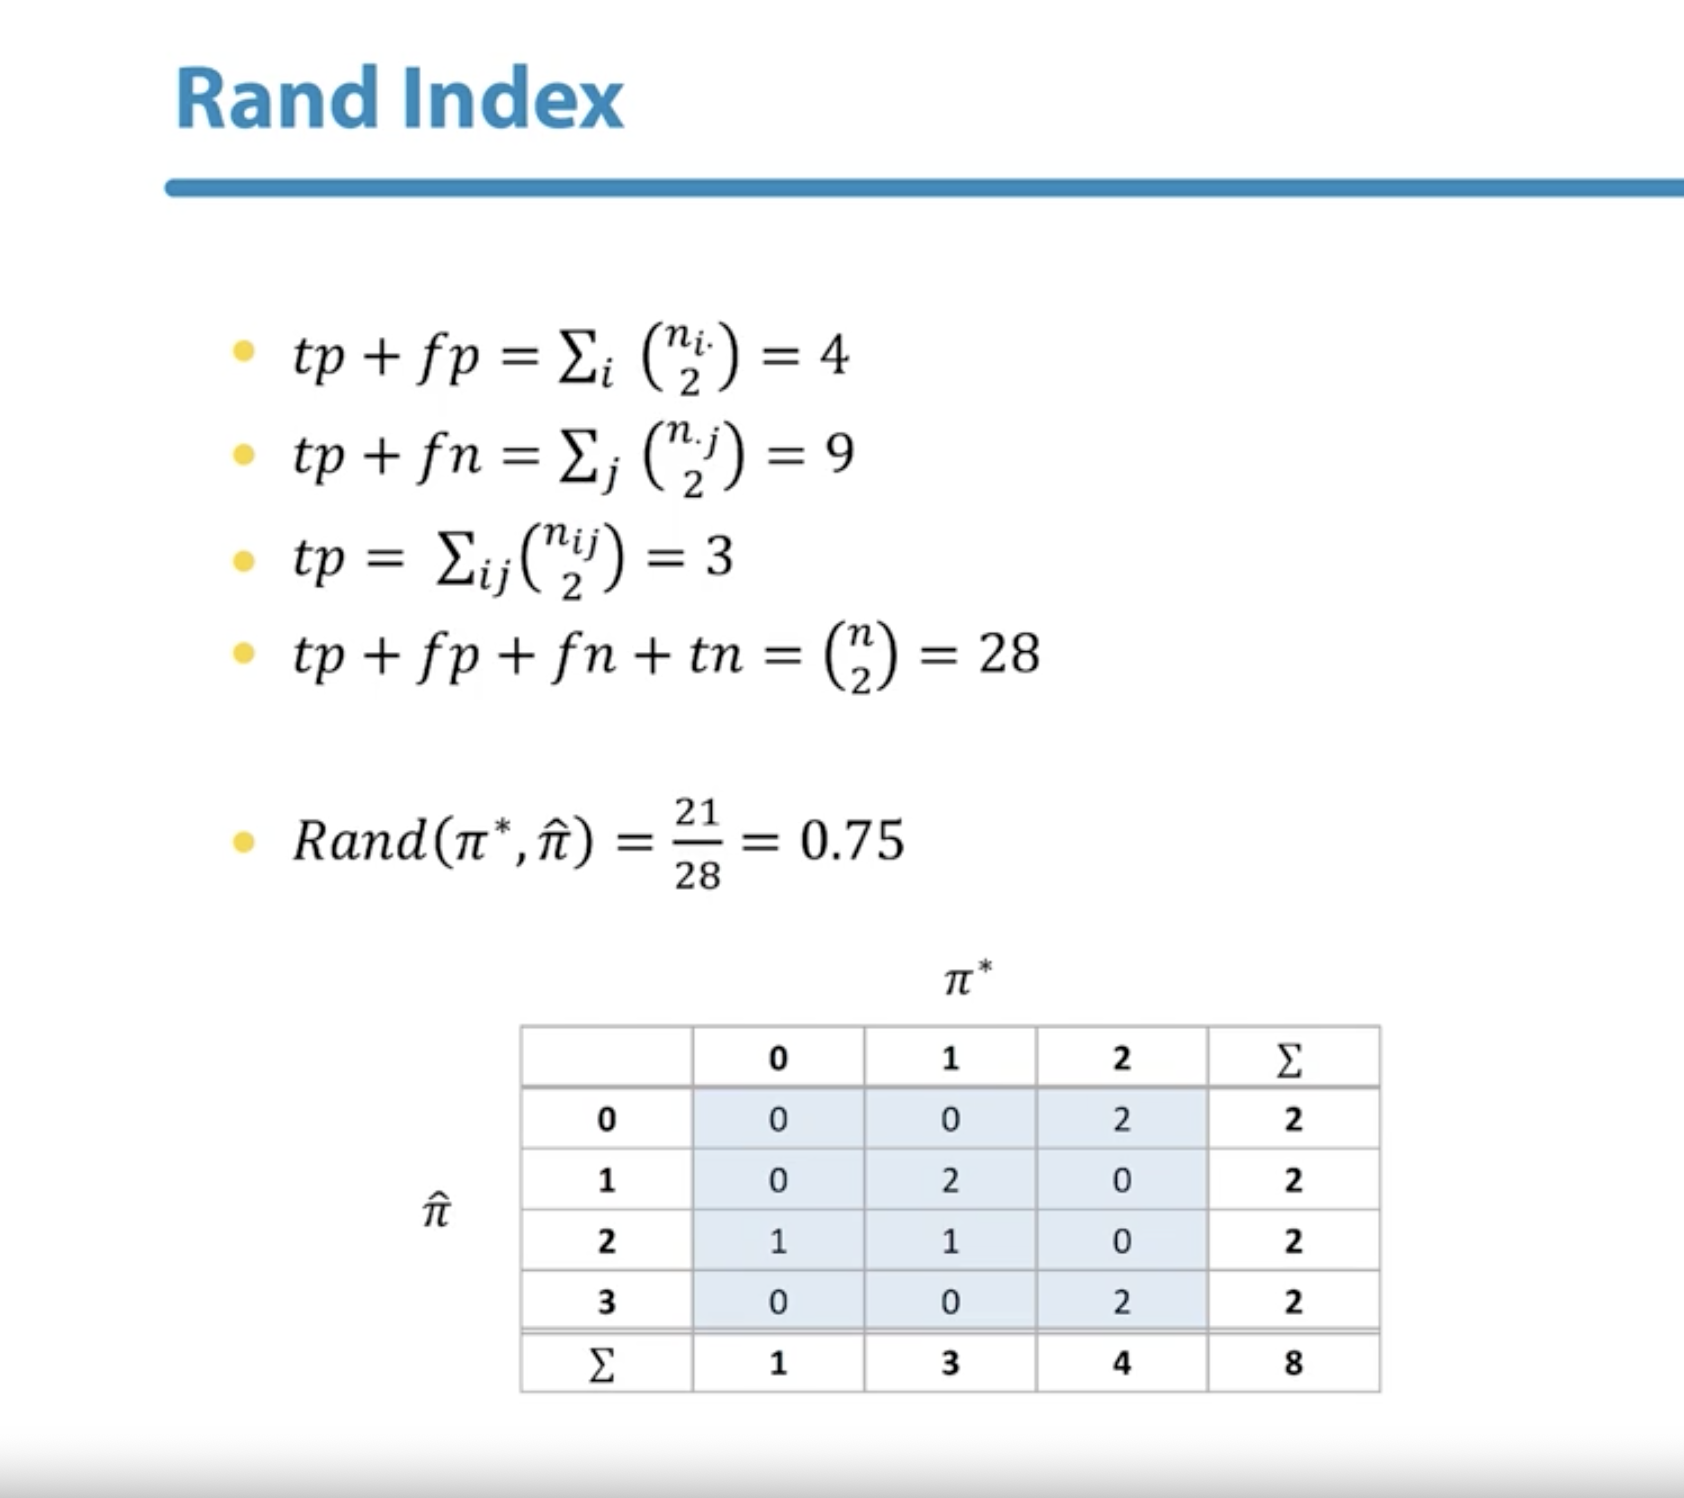

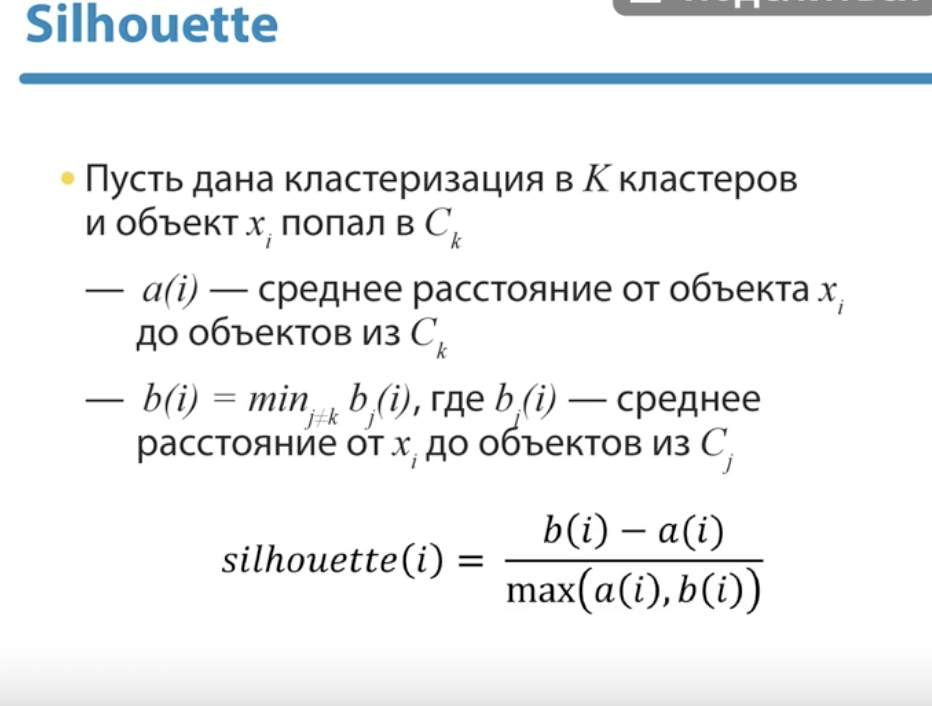

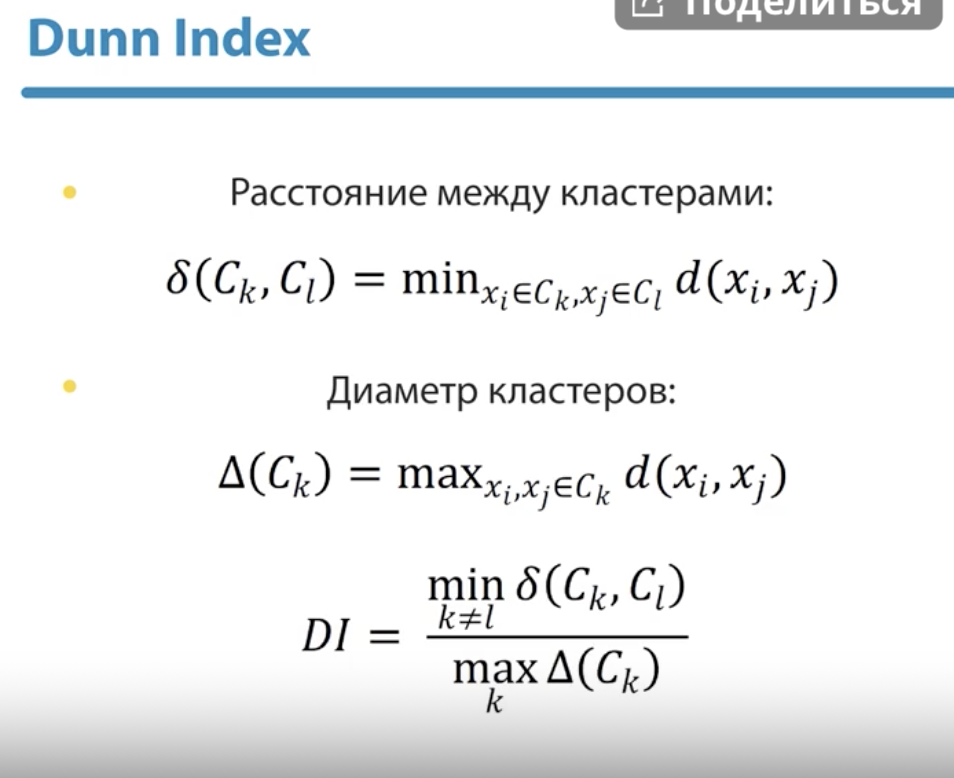

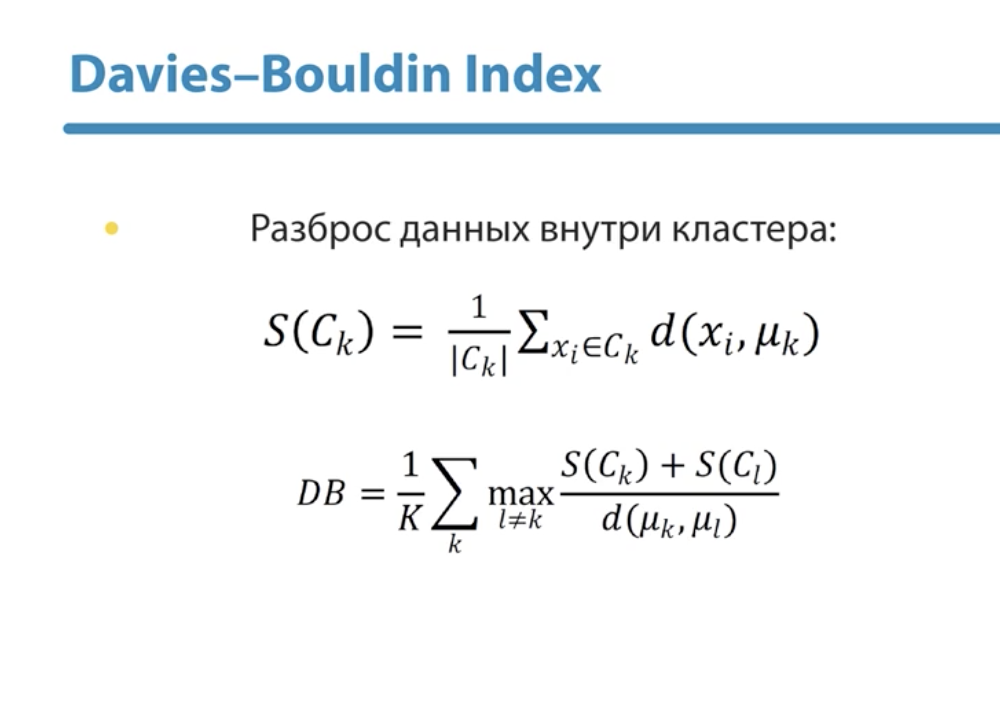